In [9]:
import numpy as np
from sklearn.utils.extmath import randomized_svd as rsvd
from matplotlib import pyplot as plt
import time

## SVD

In [10]:
# Hilbert matrix
def A(i, j):
    return 1.0/(i + j + 1)

In [11]:
M = 1500; N = 1024 # number of rows and columns
x = np.linspace(1, N, N) # grid for drawings
r = 20 # target rank
# fill the matrix Ma
Ma = np.fromfunction(A, [M, N])

In [12]:
# Estimate the time, does not save the data
start = time.time()
U, s, V = np.linalg.svd(Ma)
# Truncation of SVD
Ut = U[:, :r] # m \times r
st = s[:r] # r
Vt = V[:r, :] # r \times n
np.linalg.norm(Ma - Ut @ np.diag(st) @ Vt)
print("Classical ", time.time() - start, " sec")
start = time.time()
Ur, sr, Vr = rsvd(Ma, n_components = r, random_state = np.random.randint(1))
print("Randomized ", time.time() - start, " sec")

Classical  0.2227919101715088  sec
Randomized  0.2723665237426758  sec


Relative error of sigmas= 7.921972539071859e-16
Classical relative approximation error =  3.322653783517555e-11
Randomized straight-forward error =  3.3226596858840554e-11
Initial storage 1536000  memory cells 
 Compressed storage  50500  memory cells 


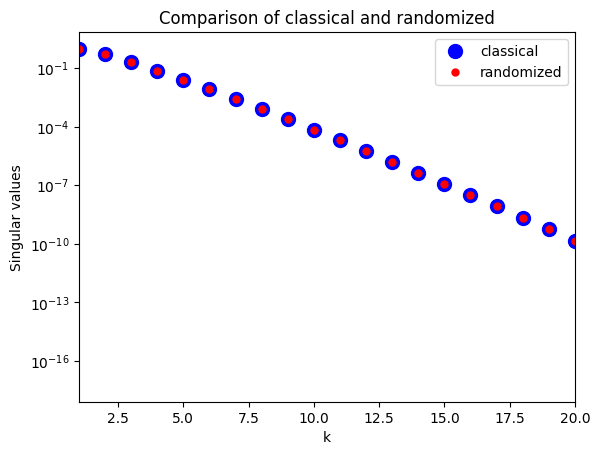

In [13]:
# Check the error for singular values
plt.title("Comparison of classical and randomized")
plt.plot(x, s / s[0], 'bo', markersize = 10, label = 'classical')
plt.plot(x[:r], sr/s[0], 'ro', markersize = 5, label = 'randomized')
plt.ylabel('Singular values')
plt.xlabel('k')
plt.xlim(1, r)
plt.legend()
plt.yscale('log')
print('Relative error of sigmas=', np.linalg.norm(s[:r] - sr) / np.linalg.norm(s[:r]))
print('Classical relative approximation error = ', np.linalg.norm(s[r:]) / np.linalg.norm(s))
print('Randomized straight-forward error = ', np.linalg.norm(Ma - (Ur @ np.diag(sr) @ Vr)) / np.linalg.norm(s))
print("Initial storage", M * N, " memory cells ")
print(" Compressed storage ", (1 + M + N) * r, " memory cells ")

In [14]:
"""
Maybe some time later

eps = 1e-6
def cross_method(m, n, A):
    I = list(range(m))
    J = list(range(m))
    r = 0
    
    def norm_update(U, V, u, v):
        
    
    while true:
        r += 1
        i = 
        
        if abs((A - U @ V)[i, j]) * np.sqrt( (m - r) * (n - r) ) < eps * 
        
        I.pop(i)
        J.pop(j)
        
        
    return U, V, r
    
"""

'\nMaybe some time later\n\neps = 1e-6\ndef cross_method(m, n, A):\n    I = list(range(m))\n    J = list(range(m))\n    r = 0\n    \n    def norm_update(U, V, u, v):\n        \n    \n    while true:\n        r += 1\n        i = \n        \n        if abs((A - U @ V)[i, j]) * np.sqrt( (m - r) * (n - r) ) < eps * \n        \n        I.pop(i)\n        J.pop(j)\n        \n        \n    return U, V, r\n    \n'

## Tensor decomposition

### CP format

In [15]:
nsteps = 10

def ALS(A, R):
    """CP decomposition ALS 
       for Alternative least squares for order three matrix 
       (requires know absolute rank R)
    """
    
    U = np.random.rand(R, A.shape[0])
    V = np.random.rand(R, A.shape[1])
    W = np.random.rand(R, A.shape[2])
    
        

In [16]:
U = np.random.rand(10, 5)
V = np.random.rand(13, 5)



In [17]:
np.einsum('ja,ka->jka', , V)

array([[[0.17898445, 0.35603626, 0.32417347, 0.09498038, 0.35687551],
        [0.24653197, 0.03539818, 0.36489622, 0.62497803, 0.60480188],
        [0.20509169, 0.34044761, 0.01330532, 0.37426409, 0.37590713],
        [0.24683506, 0.27208076, 0.49189271, 0.14727772, 0.30068477],
        [0.09706592, 0.36214853, 0.21211056, 0.20395209, 0.58882651],
        [0.24009713, 0.39933763, 0.3626903 , 0.47351338, 0.02662388],
        [0.10203725, 0.2141975 , 0.44396641, 0.66432832, 0.58759213],
        [0.26981719, 0.00551885, 0.31058451, 0.26767848, 0.17689396],
        [0.11648662, 0.2728854 , 0.05454563, 0.16822118, 0.49108013],
        [0.2056128 , 0.27820305, 0.03191428, 0.63898606, 0.5439507 ],
        [0.01014977, 0.40213752, 0.38487641, 0.29896374, 0.12498664],
        [0.27494319, 0.43104331, 0.24622508, 0.2552793 , 0.27541689],
        [0.16271498, 0.26709861, 0.42255281, 0.1005311 , 0.28647291]],

       [[0.41687737, 0.37006757, 0.62606558, 0.00280467, 0.05924722],
        [0.5742040